In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.info())
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6

In [4]:
df.loc[5:10, 'crim'] = np.nan
df.loc[15:18, 'age'] = np.nan

In [5]:
# impute missing values
df['crim'] = df['crim'].fillna(df['crim'].mean())
df['age'] = df['age'].fillna(df['age'].mean())

In [6]:
# Detect outlier using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

crim         3.594815
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         48.625000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [8]:
outliers = df[(df['tax'] < (Q1['tax'] - 1.5 *IQR['tax'])) | (df['tax'] > (Q3['tax'] + 1.5 *IQR['tax']))]
print(outliers)

Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []


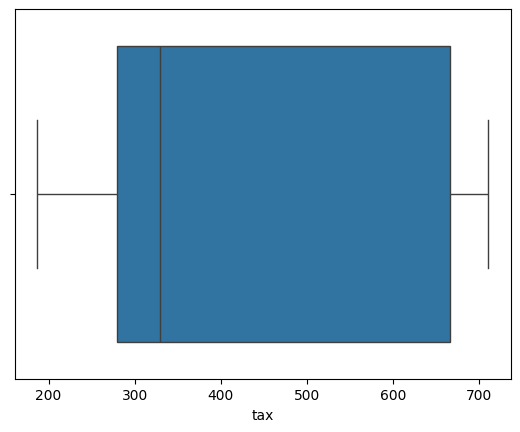

In [9]:
# create boxplot
sns.boxplot(x=df['tax'])
plt.show()

In [10]:
print(df.head())

      crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [11]:
# prompt: add coloumn

# create new coloumn
df['new_col'] = df['tax'] * 2
print(df.head())

      crim    zn  indus  chas    nox  ...  ptratio       b  lstat  medv  new_col
0  0.00632  18.0   2.31     0  0.538  ...     15.3  396.90   4.98  24.0      592
1  0.02731   0.0   7.07     0  0.469  ...     17.8  396.90   9.14  21.6      484
2  0.02729   0.0   7.07     0  0.469  ...     17.8  392.83   4.03  34.7      484
3  0.03237   0.0   2.18     0  0.458  ...     18.7  394.63   2.94  33.4      444
4  0.06905   0.0   2.18     0  0.458  ...     18.7  396.90   5.33  36.2      444

[5 rows x 15 columns]


In [12]:

df['neighbour'] = [1, 2, 3] * (len(df) // 3) + [1, 2, 3][:len(df) % 3]
df['neighbor'] = [1, 2, 3] * (len(df) // 3) + [1, 2, 3][:len(df) % 3]
print(df.head())

      crim    zn  indus  chas    nox  ...  lstat  medv  new_col  neighbour  neighbor
0  0.00632  18.0   2.31     0  0.538  ...   4.98  24.0      592          1         1
1  0.02731   0.0   7.07     0  0.469  ...   9.14  21.6      484          2         2
2  0.02729   0.0   7.07     0  0.469  ...   4.03  34.7      484          3         3
3  0.03237   0.0   2.18     0  0.458  ...   2.94  33.4      444          1         1
4  0.06905   0.0   2.18     0  0.458  ...   5.33  36.2      444          2         2

[5 rows x 17 columns]
